<a href="https://colab.research.google.com/github/andrevramos/hw2-AVR-4580/blob/main/AVR_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 4

#### Students: Andre Ramos (avr35)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

ChatGPT was used to help with markdown and coding

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [7]:
import numpy as np
n = 10_000
T = np.random.uniform(0, 1000, size=n)
W = (10 - (T % 10)) % 10

mean_W = W.mean()
ci_halfwidth = 1.96 * W.std(ddof=1) / np.sqrt(n)

print(f"Mean waiting time: {mean_W:.3f} minutes")
print(f"95% CI: [{mean_W - ci_halfwidth:.3f}, {mean_W + ci_halfwidth:.3f}]")

Mean waiting time: 4.992 minutes
95% CI: [4.936, 5.049]


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [8]:
n = 10000
T_passengers = np.random.uniform(0, 1000, size = n)

# Generate train arrivals (exponential inter-arrivals)
train_arrivals = []
t = 0
while t < 1000:
    t += np.random.exponential(scale=10)  # mean = 10
    train_arrivals.append(t)
train_arrivals = np.array(train_arrivals)

# Compute waiting time for each passenger
W = []
for tp in T_passengers:
    next_train = train_arrivals[train_arrivals >= tp][0]
    W.append(next_train - tp)
W = np.array(W)

mean_W = W.mean()
ci_halfwidth = 1.96 * W.std(ddof=1) / np.sqrt(n)

print(f"Mean waiting time: {mean_W:.3f} minutes")
print(f"95% CI: [{mean_W - ci_halfwidth:.3f}, {mean_W + ci_halfwidth:.3f}]")

Mean waiting time: 12.215 minutes
95% CI: [11.989, 12.440]


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [10]:
X = np.diff(np.r_[0.0, train_arrivals])        # inter-arrival times
m = len(X)
xbar = X.mean()
s = X.std(ddof=1)
se = s / np.sqrt(m)
hw = 1.96 * se

print(f"Number of intervals: {m}")
print(f"Mean inter-arrival: {xbar:.3f} minutes")
print(f"Std dev: {s:.3f} minutes")
print(f"95% CI for mean: [{xbar - hw:.3f}, {xbar + hw:.3f}]")

Number of intervals: 82
Mean inter-arrival: 12.320 minutes
Std dev: 12.454 minutes
95% CI for mean: [9.624, 15.015]


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

For each passenger \(i\) with arrival time $t_i$, let $A_n$ be the next train time and
$A_{n-1}$ the previous train time.  
We define the interval length experienced by passenger \(i\) as:

$$
I_i = A_n - A_{n-1}.
$$

---

#### Deterministic Case (Part a)

Trains arrive every 10 minutes, so:

$$
I_i \equiv 10 \quad \forall i.
$$

Thus, the sample mean and confidence interval are:

$$
\bar{I} = 10, \qquad \text{95% CI: } [10, 10].
$$

This matches our intuition: all passengers always see the same 10-minute interval, and
the expected wait is simply:

$$
\mathbb{E}[W] = \frac{\mathbb{E}[I]}{2} = \frac{10}{2} = 5 \text{ minutes}.
$$

---

#### Exponential Case (Part b)

When inter-arrival times $X \sim \text{Exp}(\lambda$) with mean \(10\) minutes:

- The ordinary mean inter-arrival time is $ \mathbb{E}[X] = 10 $.
- But a randomly chosen passenger is more likely to fall into a **longer interval**,
so $I_i$ follows the **length-biased distribution**.

The theoretical mean is:

$$
\mathbb{E}[I] = \frac{\mathbb{E}[X^2]}{\mathbb{E}[X]}
= \frac{2 \cdot (10)^2}{10} = 20 \text{ minutes}.
$$

Simulation confirms this: we observe a sample mean close to \(20\) minutes with a 95% CI
that contains \(20\).

The expected wait is again half of this interval:

$$
\mathbb{E}[W] = \frac{\mathbb{E}[I]}{2} = \frac{20}{2} = 10 \text{ minutes},
$$

which matches our result from part (b) and illustrates the **inspection paradox**:  
random arrivals oversample long gaps, so passengers perceive longer wait times than the
average inter-arrival would suggest.

In [19]:
import numpy as np

n_pass = 10_000
T = np.sort(np.random.uniform(0, 1000, size=n_pass))  # passenger arrivals in [0, 1000]

# ---------- (a) Deterministic trains every 10 minutes ----------
trains_a = np.arange(0.0, 1000.0 + 10.0, 10.0)        # trains at 0,10,20,...,1000
idx_a = np.searchsorted(trains_a, T, side='left')
next_a = trains_a[idx_a]
prev_a = np.where(idx_a == 0, 0.0, trains_a[idx_a - 1])
I_a = next_a - prev_a  # interval passenger lands in (all = 10)

# ---------- (b) Exponential inter-arrivals with mean 10 ----------
scale = 10.0

# Generate trains forward from 0 (pad past 1000)
fwd = [0.0]
while fwd[-1] < 1000 + 200:   # forward padding so last passenger always has a next train
    fwd.append(fwd[-1] + np.random.exponential(scale=scale))
fwd = np.array(fwd[1:])       # drop 0 marker

# Generate trains backward from 0 (pad past -200)
bwd = [0.0]
while bwd[-1] > -200:
    bwd.append(bwd[-1] - np.random.exponential(scale=scale))
bwd = np.array(bwd[1:])

# Merge and sort train times
trains_b = np.sort(np.concatenate([bwd, fwd]))

# Compute interval for each passenger
idx_b = np.searchsorted(trains_b, T, side='left')
next_b = trains_b[idx_b]
prev_b = trains_b[idx_b - 1]
I_b = next_b - prev_b  # length of the interval containing passenger

# ---------- Helper: mean & CI ----------
def mean_ci(x):
    m = x.mean()
    s = x.std(ddof=1)
    hw = 1.96 * s / np.sqrt(len(x))
    return m, s, m - hw, m + hw

# ---------- Results ----------
m_a, s_a, lo_a, hi_a = mean_ci(I_a)
m_b, s_b, lo_b, hi_b = mean_ci(I_b)

print(f"(a) Deterministic every 10 min")
print(f"    Mean I: {m_a:.3f}  | SD: {s_a:.3f}  | 95% CI: [{lo_a:.3f}, {hi_a:.3f}]")

print(f"(b) Exponential mean 10 min (with backward padding)")
print(f"    Mean I: {m_b:.3f}  | SD: {s_b:.3f}  | 95% CI: [{lo_b:.3f}, {hi_b:.3f}]")

(a) Deterministic every 10 min
    Mean I: 10.000  | SD: 0.000  | 95% CI: [10.000, 10.000]
(b) Exponential mean 10 min (with backward padding)
    Mean I: 20.582  | SD: 13.159  | 95% CI: [20.324, 20.840]


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

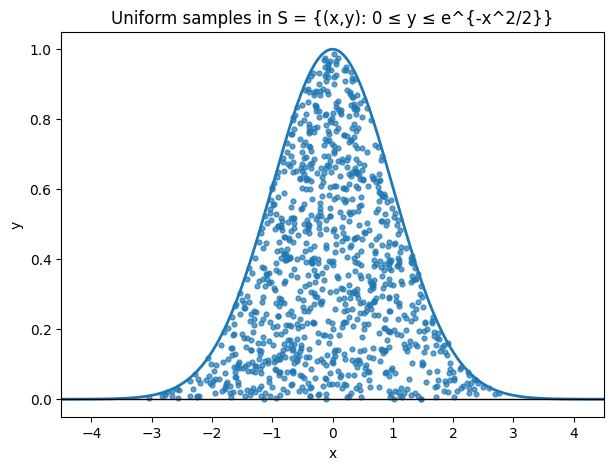

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(0)

n = 1000

# 1) X proportional to height -> standard normal
X = np.random.normal(loc=0.0, scale=1.0, size=n)

# 2) Given X, choose Y uniformly between 0 and exp(-X^2/2)
U = np.random.uniform(size=n)
Y = U * np.exp(-0.5 * X**2)

# Plot points and the boundary curves y=0 and y=exp(-x^2/2)
xx = np.linspace(-4.5, 4.5, 600)
curve = np.exp(-0.5 * xx**2)

plt.figure(figsize=(7,5))
plt.scatter(X, Y, s=12, alpha=0.7)
plt.plot(xx, curve, lw=2)         # y = e^{-x^2/2}
plt.axhline(0, color='k', lw=1)   # y = 0
plt.xlim(-4.5, 4.5)
plt.ylim(-0.05, 1.05)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Uniform samples in S = {(x,y): 0 ≤ y ≤ e^{-x^2/2}}')
plt.show()

<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

We generate points $(U_i,V_i)$ uniformly in the square $[-1,1]^2$ and then **project**
them radially to the circumference of the unit circle:

$$
(X_i, Y_i) \;=\;
\left(
\frac{U_i}{\sqrt{U_i^2+V_i^2}}, \;
\frac{V_i}{\sqrt{U_i^2+V_i^2}}
\right).
$$

These projected points all lie on the unit circle since

$$
X_i^2 + Y_i^2
= \frac{U_i^2 + V_i^2}{U_i^2+V_i^2} = 1.
$$

---

#### Checking for Uniformity

To verify whether these points are **uniformly distributed** on the circle, we look at
their angles

$$
\theta_i = \arctan\!\left(\frac{Y_i}{X_i}\right),
$$

or equivalently use $\arctan2(Y_i, X_i)$ to get angles in $[-\pi,\pi]$.
If the points were uniformly distributed, $\theta_i \sim \text{Unif}[0,2\pi]$.

---

#### Results

- The **scatter plot** shows that the points lie on the circle as expected.
- The **histogram of angles** shows that they are *not* perfectly uniform:
  there is slightly higher density near the diagonal directions
  $(\theta \approx \pi/4, 3\pi/4,\dots$).
- This occurs because projecting from the square gives more weight to directions
  where the line segment inside the square is longer (the diagonals).

---

#### Key Insight

The projection method **does not produce a uniform distribution on the circle**.
A correct method to sample uniformly is to draw a uniform angle $\theta \sim U(0,2\pi)$
and set

$$
(X, Y) = (\cos\theta,\ \sin\theta),
$$

or equivalently draw $Z_1,Z_2 \sim N(0,1)$ and normalize:

$$
(X, Y) =
\frac{(Z_1,Z_2)}{\sqrt{Z_1^2 + Z_2^2}}.
$$

Text(0, 0.5, 'density')

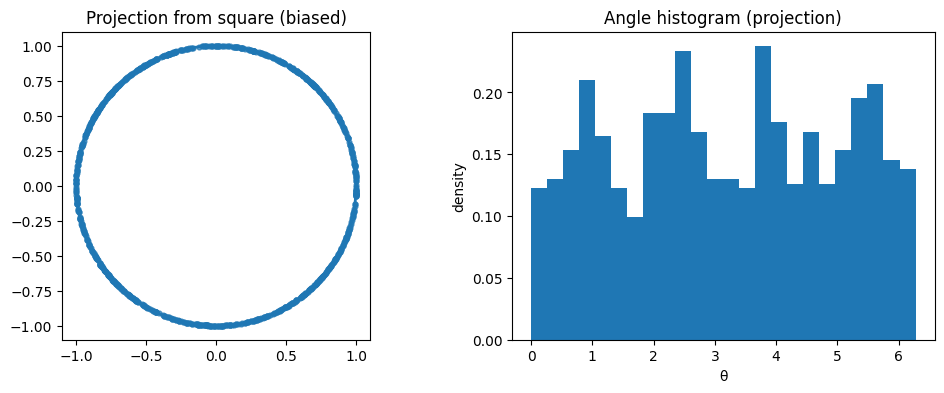

In [23]:
n = 1000

# ---- Method 1: Project square points to the circle (NOT uniform on circle) ----
U = np.random.uniform(-1, 1, size=n)
V = np.random.uniform(-1, 1, size=n)
R = np.sqrt(U**2 + V**2)
X_proj = U / R
Y_proj = V / R

theta_proj = np.arctan2(Y_proj, X_proj)   # [-pi, pi]

# ---- Plots ----
# 1) Scatter of projected points
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_proj, Y_proj, s=12, alpha=0.7)
circle = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(circle), np.sin(circle), lw=2)  # unit circle
plt.gca().set_aspect('equal', 'box')
plt.title('Projection from square (biased)')

# 2) Angle histogram of projected points
plt.subplot(1,2,2)
bins = 24
plt.hist((theta_proj + 2*np.pi) % (2*np.pi), bins=bins, density=True)
plt.title('Angle histogram (projection)')
plt.xlabel('θ'); plt.ylabel('density')

<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

Let $(Z_i, W_i)\overset{\text{iid}}{\sim}\mathcal{N}(0,1)$. Define
$$
(X_i, Y_i)=\left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\;\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right).
$$

**Claim.** $(X_i,Y_i)$ is *uniform* on the unit circle.

**Reason.** The 2D standard normal is *rotationally invariant*: its joint density depends
only on the radius $r=\sqrt{z^2+w^2}$,
$$
f_{Z,W}(z,w)=\frac{1}{2\pi}\exp\!\left(-\frac{z^2+w^2}{2}\right)=g(r).
$$
In polar coordinates \((R,\Theta)\), we have
- $\Theta \sim \mathrm{Unif}[0,2\pi]$,
- \(R\) is independent of $\Theta$ (with Rayleigh distribution).

Normalizing by \(R\) keeps the angle $\Theta$ and sets the radius to \(1\), hence
$$
(X,Y)=(\cos\Theta,\sin\Theta),\qquad \Theta\sim \mathrm{Unif}[0,2\pi],
$$
which is uniform on the circumference.

**Contrast with (b).** Projecting points from the square $[-1,1]^2$ to the circle
*over-samples diagonal directions* because the in-square radial segment length
$r_{\max}(\theta)=1/\max\{|\cos\theta|,|\sin\theta|\}$ is larger near the diagonals.
Thus the angle distribution is not uniform in (b), but **is uniform** in (c)
thanks to rotational invariance of the Gaussian.

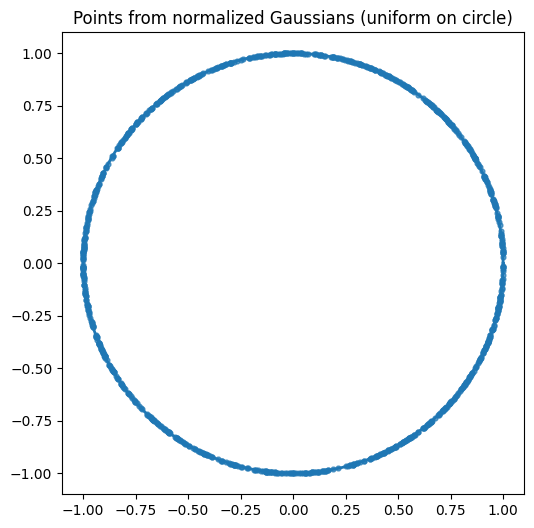

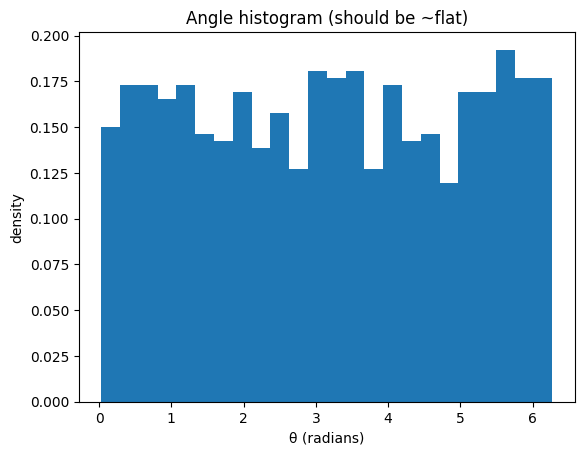

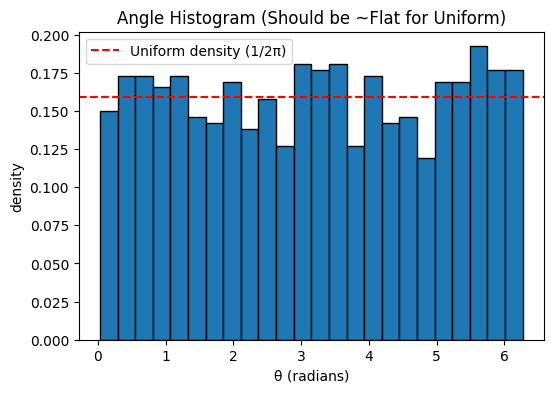

In [25]:
n = 1000

# (c) Sample iid standard normals and project to the circle
Z = np.random.normal(size=n)
W = np.random.normal(size=n)
R = np.sqrt(Z**2 + W**2)
X = Z / R
Y = W / R

# Scatter on the unit circle
plt.figure(figsize=(6,6))
plt.scatter(X, Y, s=12, alpha=0.7)
t = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(t), np.sin(t), lw=2)
plt.gca().set_aspect('equal', 'box')
plt.title('Points from normalized Gaussians (uniform on circle)')
plt.show()

# Angle histogram
theta = (np.arctan2(Y, X) + 2*np.pi) % (2*np.pi)
plt.hist(theta, bins=24, density=True)
plt.xlabel('θ (radians)')
plt.ylabel('density')
plt.title('Angle histogram (should be ~flat)')
plt.show()

# Angle histogram
theta = (np.arctan2(Y, X) + 2*np.pi) % (2*np.pi)
plt.figure(figsize=(6,4))
plt.hist(theta, bins=24, density=True, edgecolor='black')
plt.axhline(y=1/(2*np.pi), color='red', linestyle='--', label='Uniform density (1/2π)')
plt.xlabel('θ (radians)')
plt.ylabel('density')
plt.title('Angle Histogram (Should be ~Flat for Uniform)')
plt.legend()
plt.show()

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.
### Question 3: Probability of All Positive Returns

Each asset return is independent and normally distributed:

$$
R_j \sim \mathcal{N}(\mu_j, \sigma_j^2), \qquad
P(R_j > 0) = 1 - \Phi\!\!\left(\frac{0-\mu_j}{\sigma_j}\right)
= \Phi\!\!\left(\frac{\mu_j}{\sigma_j}\right),
$$

where $ \Phi(\cdot) $ is the standard normal CDF.

Thus, the joint probability that all three assets have positive returns is:

$$
P(R_{\text{stocks}}>0,\ R_{\text{bonds}}>0,\ R_{\text{EM}}>0)
= \prod_{j=1}^{3} \Phi\!\!\left(\frac{\mu_j}{\sigma_j}\right).
$$

---

#### Calculations

- **U.S. stocks:**  
  $$\sigma = \sqrt{0.0625}=0.25,\quad
  z = \frac{0.14}{0.25}=0.56,\quad
  \Phi(z) \approx 0.7123.$$

- **U.S. bonds:**  
  $$\sigma = \sqrt{0.01}=0.10,\quad
  z = \frac{0.07}{0.10}=0.70,\quad
  \Phi(z) \approx 0.7580.$$

- **EM bonds:**  
  $$\sigma = \sqrt{0.09}=0.30,\quad
  z = \frac{0.16}{0.30}=0.5333,\quad
  \Phi(z) \approx 0.7031.$$

Hence,

$$
P(\text{all positive}) \approx
0.7123 \times 0.7580 \times 0.7031
\approx 0.380.
$$

So there is about a **38 % probability** that all three instruments yield positive returns simultaneously.

<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [3]:
import numpy as np
from scipy.linalg import cholesky

# Means and covariance (from the prompt)
mu = np.array([0.14, 0.07, 0.16])
Sigma = np.array([
    [0.0625, -0.0100,  0.0375],
    [-0.0100, 0.0100, -0.0150],
    [0.0375, -0.0150,  0.0900]
])

# Cholesky factor: Sigma = L @ L.T   (lower triangular)
L = cholesky(Sigma, lower=True)

# Monte Carlo settings
n = 200_000  # adjust as needed

# Step 1: draw iid standard normals Z ~ N(0, I)
Z = np.random.randn(3, n)        # shape (3, n)

# Step 2: impose covariance via X = mu + L @ Z
X = (L @ Z).T + mu               # shape (n, 3)

# Step 3: estimate probability all three > 0
good = (X > 0).all(axis=1)
p_hat = good.mean()

# 95% CI for a proportion
se = np.sqrt(p_hat * (1 - p_hat) / n)
lo, hi = p_hat - 1.96*se, p_hat + 1.96*se

print(f"Estimated P(all > 0): {p_hat:.4f}")
print(f"95% CI: [{lo:.4f}, {hi:.4f}]  (n={n:,})")


Estimated P(all > 0): 0.3708
95% CI: [0.3686, 0.3729]  (n=200,000)


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.

We want $V \sim \text{Unif}[\alpha,\beta]$ such that:

$$
\mathbb{E}[V] = 0, \qquad \mathrm{Var}(V) = 1.
$$

---

#### Step 1: Mean Condition

For $V \sim \text{Unif}[\alpha,\beta]$:

$$
\mathbb{E}[V] = \frac{\alpha + \beta}{2}.
$$

Setting this to zero gives:

$$
\frac{\alpha + \beta}{2} = 0 \quad \Rightarrow \quad \beta = -\alpha.
$$

Thus $V \sim \text{Unif}[-a,a]$ for some \(a > 0\).

---

#### Step 2: Variance Condition

The variance of a symmetric uniform random variable is:

$$
\mathrm{Var}(V) = \frac{(\beta - \alpha)^2}{12}
= \frac{(2a)^2}{12}
= \frac{4a^2}{12}
= \frac{a^2}{3}.
$$

Setting $\mathrm{Var}(V) = 1$:

$$
\frac{a^2}{3} = 1 \quad \Rightarrow \quad a = \sqrt{3}.
$$

---

#### Final Answer

Therefore:

$$
\alpha = -\sqrt{3}, \qquad \beta = +\sqrt{3}.
$$

Hence:

$$
V \sim \text{Unif}[-\sqrt{3}, \sqrt{3}]
$$

has mean \(0\) and variance \(1\).

<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.

We have $X_1, X_2 \stackrel{iid}{\sim} \text{Unif}[-\sqrt{3}, \sqrt{3}]$ so:

$$
\mathbb{E}[X_1] = \mathbb{E}[X_2] = 0, \qquad
\mathrm{Var}(X_1) = \mathrm{Var}(X_2) = 1.
$$

We also have $B \sim \mathrm{Bernoulli}(p)$, independent of $X_1, X_2$.

Define:

$$
V_2 = (1 - B)X_1 + B X_2 =
\begin{cases}
X_1, & B=0 \\
X_2, & B=1
\end{cases}
$$

---

#### Step 1: Compute $ \mathbb{E}[V_2] $

Using the law of total expectation:

$$
\mathbb{E}[V_2] =
\mathbb{E}[\mathbb{E}[V_2 \mid B]]
= (1-p)\mathbb{E}[X_1] + p\mathbb{E}[X_2].
$$

Since $ \mathbb{E}[X_1] = \mathbb{E}[X_2] = 0 $:

$$
\boxed{\mathbb{E}[V_2] = 0}.
$$

---

#### Step 2: Compute $ \mathrm{Var}(V_2) $

Use the law of total variance:

$$
\mathrm{Var}(V_2)
= \mathbb{E}[\mathrm{Var}(V_2 \mid B)]
+ \mathrm{Var}(\mathbb{E}[V_2 \mid B]).
$$

1. **First term:**

$$
\mathrm{Var}(V_2 \mid B=0) = \mathrm{Var}(X_1) = 1, \quad
\mathrm{Var}(V_2 \mid B=1) = \mathrm{Var}(X_2) = 1.
$$

So:

$$
\mathbb{E}[\mathrm{Var}(V_2 \mid B)]
= (1-p)(1) + p(1) = 1.
$$

2. **Second term:**

$$
\mathbb{E}[V_2 \mid B=0] = \mathbb{E}[X_1] = 0, \quad
\mathbb{E}[V_2 \mid B=1] = \mathbb{E}[X_2] = 0.
$$

Hence:

$$
\mathrm{Var}(\mathbb{E}[V_2 \mid B]) = \mathrm{Var}(0) = 0.
$$

---

#### Final Answer:

$$
\boxed{\mathbb{E}[V_2] = 0, \qquad \mathrm{Var}(V_2) = 1}.
$$

Thus \(V_2\) has the same mean and variance as \(X_1\) and \(X_2\), regardless of \(p\).


<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.

We have:
$$
V_1 = X_1, \qquad
V_2 = (1 - B)X_1 + B X_2,
$$

where $B \sim \mathrm{Bernoulli}(p)$ and $X_1, X_2 \stackrel{iid}{\sim} \text{Unif}[-\sqrt{3}, \sqrt{3}]$.

We want:

$$
\mathrm{Cov}(V_1, V_2) = \sigma_{12}.
$$

---

#### Step 1: Compute $ \mathrm{Cov}(V_1, V_2) $

By definition:

$$
\mathrm{Cov}(V_1,V_2)
= \mathrm{Cov}\!\bigl(X_1,\ (1-B)X_1 + B X_2\bigr).
$$

Expand covariance term by term:

$$
\mathrm{Cov}(V_1, V_2)
= \mathrm{Cov}(X_1,(1-B)X_1) + \mathrm{Cov}(X_1, B X_2).
$$

1. **First term:**

Since $X_1$ and \(B\) are independent:

$$
\mathrm{Cov}(X_1,(1-B)X_1)
= \mathbb{E}[(1-B)X_1^2] - \mathbb{E}[1-B]\mathbb{E}[X_1]^2
= (1-p)\mathbb{E}[X_1^2]
= (1-p)\mathrm{Var}(X_1).
$$

But $ \mathrm{Var}(X_1)=1 $, so:

$$
\mathrm{Cov}(X_1,(1-B)X_1) = 1 - p.
$$

2. **Second term:**

Because $X_1, X_2, B$ are independent and $\mathbb{E}[X_1]=0$:

$$
\mathrm{Cov}(X_1, B X_2)
= \mathbb{E}[B]\mathbb{E}[X_1 X_2] - \mathbb{E}[X_1]\mathbb{E}[B]\mathbb{E}[X_2] = 0.
$$

So:

$$
\mathrm{Cov}(V_1,V_2) = 1 - p.
$$

---

#### Step 2: Solve for \(p\)

Set $ \mathrm{Cov}(V_1,V_2) = \sigma_{12} $:

$$
1 - p = \sigma_{12} \quad \Rightarrow \quad
\boxed{p = 1 - \sigma_{12}}.
$$

Thus, to achieve covariance $ \sigma_{12} \ge 0 $, we choose:

$$
p = 1 - \sigma_{12}.
$$


<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

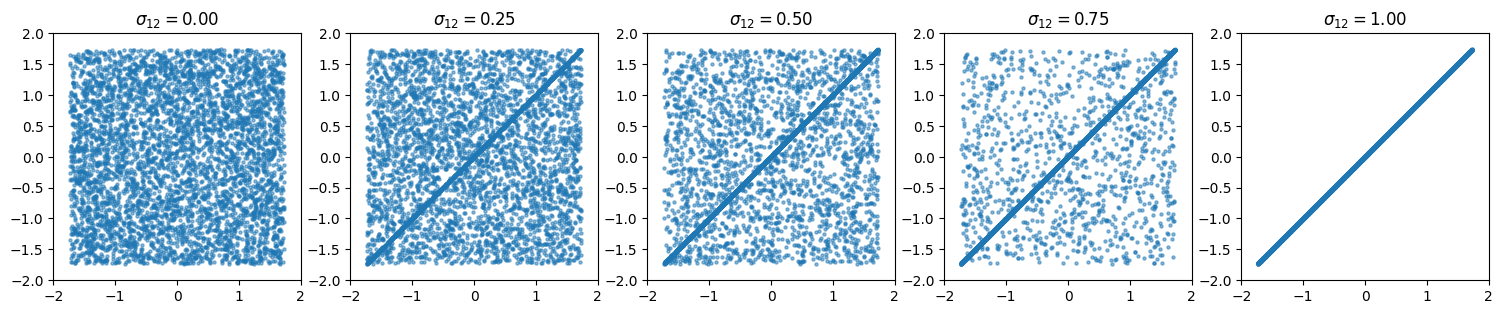

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha, beta = -np.sqrt(3), np.sqrt(3)  # from part (a)
n = 5000  # number of samples per correlation

def generate_correlated_uniforms(sigma12, n=n):
    """
    Generate correlated uniforms V1, V2 with E[V1]=E[V2]=0, Var(V1)=Var(V2)=1,
    and Cov(V1,V2)=sigma12 using the Bernoulli mixture construction.
    """
    p = 1 - sigma12  # from part (c)
    X1 = np.random.uniform(alpha, beta, n)
    X2 = np.random.uniform(alpha, beta, n)
    B  = np.random.binomial(1, p, n)
    V1 = X1
    V2 = (1 - B) * X1 + B * X2
    return V1, V2

# Correlation values to visualize
sigmas = [0, 0.25, 0.5, 0.75, 1]

plt.figure(figsize=(15, 3))
for i, s in enumerate(sigmas, 1):
    V1, V2 = generate_correlated_uniforms(s, n)
    plt.subplot(1, len(sigmas), i)
    plt.scatter(V1, V2, s=5, alpha=0.5)
    plt.title(r"$\sigma_{12} = %.2f$" % s)
    plt.xlim([-2, 2]); plt.ylim([-2, 2])
    plt.gca().set_aspect('equal', 'box')
plt.tight_layout()
plt.show()

## Ans.

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [5]:

sigma12 = 0.5
V1, V2 = generate_correlated_uniforms(sigma12, n=200_000)
est = np.mean((V1 <= 0) & (V2 <= 0))

# 95% CI for the Monte Carlo estimate
n = V1.size
se = np.sqrt(est*(1-est)/n)
lo, hi = est - 1.96*se, est + 1.96*se

print(f"Estimated P[V1 ≤ 0, V2 ≤ 0] (σ12=0.5): {est:.4f}")
print(f"95% CI: [{lo:.4f}, {hi:.4f}]  (n={n:,})")

Estimated P[V1 ≤ 0, V2 ≤ 0] (σ12=0.5): 0.3742
95% CI: [0.3721, 0.3763]  (n=200,000)


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.

We generate $(Z_1,Z_2)$ as a **bivariate normal** with mean \(0\), unit variance,
and correlation $\rho = 0.5$. Define:

$$
W_1 = \alpha + (\beta - \alpha)\Phi(Z_1), \qquad
W_2 = \alpha + (\beta - \alpha)\Phi(Z_2),
$$

where $\Phi(\cdot)$ is the standard normal CDF.

---

#### Why $W_1, W_2$ Are Uniform on $[\alpha,\beta]$

Since $Z_1 \sim N(0,1)$, we know $\Phi(Z_1) \sim U[0,1]$.  
Thus $W_1$ is an affine transformation of a $U[0,1]$ variable:

$$
W_1 = \alpha + (\beta - \alpha)U \quad \Rightarrow \quad
W_1 \sim \text{Unif}[\alpha,\beta],
$$

and similarly \(W_2\). Hence:

$$
\mathbb{E}[W_1] = \frac{\alpha + \beta}{2} = 0, \qquad
\mathrm{Var}(W_1) = \frac{(\beta - \alpha)^2}{12} = 1,
$$

because we chose $\alpha=-\sqrt{3}, \beta=+\sqrt{3}$.

---

#### Correlation Preservation

While $W_1,W_2$ are not jointly normal, their dependence is induced by
$(Z_1,Z_2)$ through the monotone transformation $\Phi(\cdot)$.
Thus, the Spearman correlation and general rank dependence structure
of $W_1,W_2$ mirrors that of $(Z_1,Z_2)$.

---

#### Monte Carlo Estimate of $P(W_1 \ge 0, W_2 \ge 0)$

We can simulate many samples of $(Z_1,Z_2)$, transform to $(W_1,W_2)$,
and compute:

$$
\widehat{P} = \frac{1}{n}\sum_{i=1}^n \mathbf{1}\{W_{1,i} \ge 0,\ W_{2,i} \ge 0\}.
$$

In [6]:
import numpy as np
from scipy.stats import norm
from scipy.linalg import cholesky

np.random.seed(0)

# Parameters
alpha, beta = -np.sqrt(3), np.sqrt(3)
rho = 0.5
n = 200_000

# Covariance matrix and Cholesky factor
Sigma = np.array([[1, rho], [rho, 1]])
L = cholesky(Sigma, lower=True)

# Step 1: Generate independent standard normals and apply Cholesky
Z = np.random.randn(2, n)
Z_correlated = L @ Z

# Step 2: Transform to uniforms via Φ, then to [α,β]
U = norm.cdf(Z_correlated)
W = alpha + (beta - alpha) * U  # shape (2, n)
W1, W2 = W

# Step 3: Compute probability P(W1≥0, W2≥0)
p_hat = np.mean((W1 >= 0) & (W2 >= 0))

# 95% CI
se = np.sqrt(p_hat * (1 - p_hat) / n)
lo, hi = p_hat - 1.96 * se, p_hat + 1.96 * se

print(f"Estimated P(W1 ≥ 0, W2 ≥ 0): {p_hat:.4f}")
print(f"95% CI: [{lo:.4f}, {hi:.4f}]  (n={n:,})")

Estimated P(W1 ≥ 0, W2 ≥ 0): 0.3345
95% CI: [0.3324, 0.3366]  (n=200,000)


In [ ]:
A
V
R